<a href="https://colab.research.google.com/github/PrajwalRaut8/Human-or-Horse-Classification/blob/main/Human_or_Horse_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

In [86]:
dataset, info = tfds.load('horses_or_humans', with_info = True, as_supervised = True)

In [87]:
info

tfds.core.DatasetInfo(
    name='horses_or_humans',
    full_name='horses_or_humans/3.0.0',
    description="""
    A large set of images of horses and humans.
    """,
    homepage='http://laurencemoroney.com/horses-or-humans-dataset',
    data_path='/root/tensorflow_datasets/horses_or_humans/3.0.0',
    file_format=tfrecord,
    download_size=153.59 MiB,
    dataset_size=153.53 MiB,
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=256, num_shards=1>,
        'train': <SplitInfo num_examples=1027, num_shards=2>,
    },
    citation="""@ONLINE {horses_or_humans,
    author = "Laurence Moroney",
    title = "Horses or Humans Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/horses-or-humans-dataset"
    }""",
)

In [88]:
class_names = info.features['label'].names
class_names

['horses', 'humans']

In [89]:
info.supervised_keys, info.splits

(('image', 'label'),
 {'train': <SplitInfo num_examples=1027, num_shards=2>,
  'test': <SplitInfo num_examples=256, num_shards=1>})

In [90]:
for i, example in enumerate(dataset['train']):
  image, label = example
  save_dir = 'horse-or-human/train/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok = True)
  filepath = save_dir + "/" + class_names[label] + "_" + str(i) + ".jpg"
  print(filepath)

  tf.keras.preprocessing.image.save_img(filepath, image.numpy())

horse-or-human/train/horses/horses_0.jpg
horse-or-human/train/horses/horses_1.jpg
horse-or-human/train/horses/horses_2.jpg
horse-or-human/train/horses/horses_3.jpg
horse-or-human/train/horses/horses_4.jpg
horse-or-human/train/horses/horses_5.jpg
horse-or-human/train/horses/horses_6.jpg
horse-or-human/train/humans/humans_7.jpg
horse-or-human/train/humans/humans_8.jpg
horse-or-human/train/humans/humans_9.jpg
horse-or-human/train/humans/humans_10.jpg
horse-or-human/train/humans/humans_11.jpg
horse-or-human/train/horses/horses_12.jpg
horse-or-human/train/humans/humans_13.jpg
horse-or-human/train/humans/humans_14.jpg
horse-or-human/train/humans/humans_15.jpg
horse-or-human/train/humans/humans_16.jpg
horse-or-human/train/horses/horses_17.jpg
horse-or-human/train/humans/humans_18.jpg
horse-or-human/train/humans/humans_19.jpg
horse-or-human/train/horses/horses_20.jpg
horse-or-human/train/horses/horses_21.jpg
horse-or-human/train/humans/humans_22.jpg
horse-or-human/train/humans/humans_23.jpg
ho

In [91]:
for i, example in enumerate(dataset['test']):
  image, label = example
  save_dir = 'horse-or-human/test/{}'.format(class_names[label])
  os.makedirs(save_dir, exist_ok = True)
  filepath = save_dir + "/" + class_names[label] + "_" + str(i) + ".jpg"
  print(filepath)

  tf.keras.preprocessing.image.save_img(filepath, image.numpy())

horse-or-human/test/horses/horses_0.jpg
horse-or-human/test/horses/horses_1.jpg
horse-or-human/test/horses/horses_2.jpg
horse-or-human/test/humans/humans_3.jpg
horse-or-human/test/humans/humans_4.jpg
horse-or-human/test/horses/horses_5.jpg
horse-or-human/test/horses/horses_6.jpg
horse-or-human/test/humans/humans_7.jpg
horse-or-human/test/horses/horses_8.jpg
horse-or-human/test/humans/humans_9.jpg
horse-or-human/test/horses/horses_10.jpg
horse-or-human/test/humans/humans_11.jpg
horse-or-human/test/humans/humans_12.jpg
horse-or-human/test/horses/horses_13.jpg
horse-or-human/test/humans/humans_14.jpg
horse-or-human/test/horses/horses_15.jpg
horse-or-human/test/horses/horses_16.jpg
horse-or-human/test/humans/humans_17.jpg
horse-or-human/test/horses/horses_18.jpg
horse-or-human/test/humans/humans_19.jpg
horse-or-human/test/horses/horses_20.jpg
horse-or-human/test/humans/humans_21.jpg
horse-or-human/test/horses/horses_22.jpg
horse-or-human/test/horses/horses_23.jpg
horse-or-human/test/horses

In [92]:
# flow, flow_from_dataframe, flow_from_directory

In [93]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (300,300)
batch_size = 32

train_dir = "horse-or-human/train"
train_datagen = ImageDataGenerator(rescale = 1/255)
train_generator = train_datagen.flow_from_directory(train_dir, target_size = image_size, batch_size=batch_size, class_mode='binary')

test_dir = "horse-or-human/test"
test_datagen = ImageDataGenerator(rescale = 1/255)
test_generator = test_datagen.flow_from_directory(test_dir, target_size = image_size, batch_size=batch_size, class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [94]:
train_generator.class_indices, train_generator.class_mode, train_generator.classes, train_generator.filenames[:5], train_generator.samples

({'horses': 0, 'humans': 1},
 'binary',
 array([0, 0, 0, ..., 1, 1, 1], dtype=int32),
 ['horses/horses_0.jpg',
  'horses/horses_1.jpg',
  'horses/horses_1000.jpg',
  'horses/horses_1004.jpg',
  'horses/horses_1005.jpg'],
 1027)

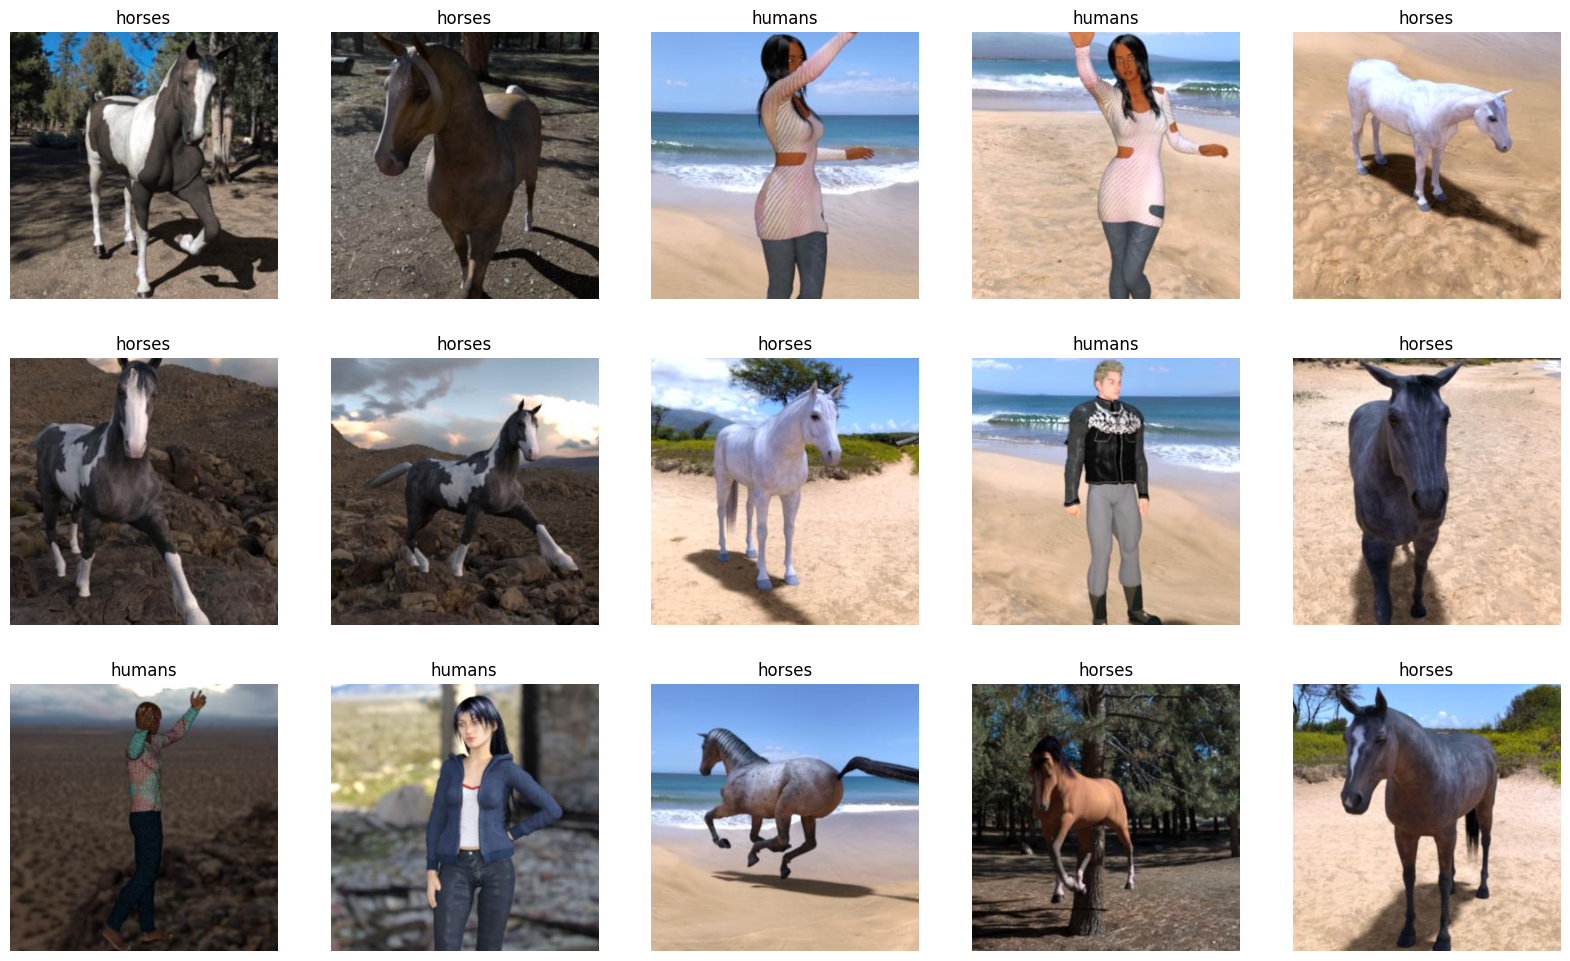

In [95]:
import matplotlib.pyplot as plt

nrows = 3
ncols = 5

train_path = 'horse-or-human/train'
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

next_batch = train_generator.next()
for i in range(0,nrows*ncols):
  ax = plt.subplot(nrows, ncols, i+1)
  ax.axis('Off')
  plt.imshow(next_batch[0][i])
  class_idx = next_batch[1][i]
  plt.title(class_names[int(class_idx)])

plt.show()

In [96]:
next_batch

(array([[[[0.12156864, 0.1254902 , 0.10588236],
          [0.20000002, 0.20392159, 0.18431373],
          [0.2392157 , 0.24313727, 0.21960786],
          ...,
          [0.07058824, 0.11764707, 0.18039216],
          [0.05490196, 0.09019608, 0.14901961],
          [0.04705883, 0.08627451, 0.13333334]],
 
         [[0.20392159, 0.20784315, 0.18823531],
          [0.21960786, 0.22352943, 0.20392159],
          [0.19607845, 0.20000002, 0.1764706 ],
          ...,
          [0.09411766, 0.14117648, 0.20392159],
          [0.07058824, 0.10980393, 0.15686275],
          [0.04705883, 0.08627451, 0.13333334]],
 
         [[0.25490198, 0.25882354, 0.2392157 ],
          [0.22352943, 0.227451  , 0.20784315],
          [0.15294118, 0.15686275, 0.13333334],
          ...,
          [0.10196079, 0.13725491, 0.19607845],
          [0.08235294, 0.1137255 , 0.16470589],
          [0.06666667, 0.09803922, 0.14117648]],
 
         ...,
 
         [[0.48627454, 0.42352945, 0.3647059 ],
          [0.49019

In [97]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

import numpy as np
import tensorflow as tf

In [98]:
def get_model():
  model = Sequential()

  # 1st layer CNN
  model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(300,300,3)))
  model.add(MaxPooling2D(pool_size = (5,5)))
  # 2nd layer CNN
  model.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size = (5,5)))
  # 3rd layer CNN
  model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides=2))
  # 4th layer CNN
  model.add(Conv2D(filters=512, kernel_size=(3,3), activation='relu'))
  # add flatten layer
  model.add(Flatten())
  model.add(Dense(512,activation='relu'))

  model.add(Dense(1, activation='sigmoid'))

  return model


In [99]:
model = get_model()

In [100]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 298, 298, 128)     3584      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 59, 59, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 57, 57, 256)       295168    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 11, 11, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 9, 9, 512)         1180160   
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 4, 4, 512)       

In [101]:
model.layers

In [102]:
weights, biases = model.layers[0].get_weights()

In [103]:
from keras.losses import binary_crossentropy  # Import the binary cross-entropy loss function

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [104]:
history = model.fit(train_generator, epochs=4, validation_data=test_generator)


Epoch 1/4
33/33 [==============================] - 8s 177ms/step - loss: 0.5628 - accuracy: 0.6456 - val_loss: 0.6337 - val_accuracy: 0.8789
Epoch 2/4
33/33 [==============================] - 5s 163ms/step - loss: 0.1766 - accuracy: 0.9464 - val_loss: 1.2659 - val_accuracy: 0.8555
Epoch 3/4
33/33 [==============================] - 5s 151ms/step - loss: 0.0952 - accuracy: 0.9640 - val_loss: 1.4042 - val_accuracy: 0.8398
Epoch 4/4
33/33 [==============================] - 5s 147ms/step - loss: 0.0204 - accuracy: 0.9912 - val_loss: 1.3480 - val_accuracy: 0.8633


In [105]:
history.history

{'loss': [0.5627725124359131,
  0.1765502691268921,
  0.09522878378629684,
  0.020406799390912056],
 'accuracy': [0.6455696225166321,
  0.9464459419250488,
  0.9639727473258972,
  0.9912366271018982],
 'val_loss': [0.6336867809295654,
  1.265923261642456,
  1.404234528541565,
  1.3480104207992554],
 'val_accuracy': [0.87890625, 0.85546875, 0.83984375, 0.86328125]}

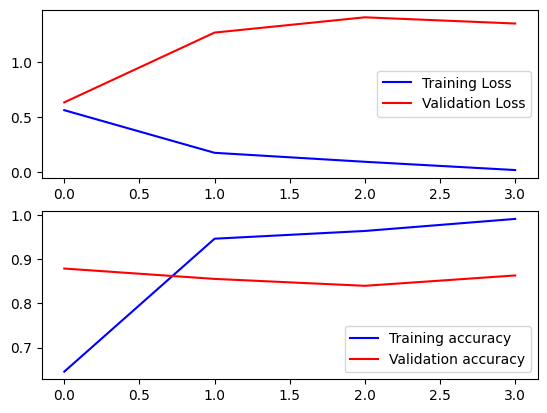

In [106]:
# plot training history
fix, ax = plt.subplots(2,1)

ax[0].plot(history.history['loss'], color='b', label='Training Loss')
ax[0].plot(history.history['val_loss'], color='r', label='Validation Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], color='b', label='Training accuracy')
ax[1].plot(history.history['val_accuracy'], color='r', label='Validation accuracy')
ax[1].legend()

In [107]:
# save model
model.save('horse-or-human.h5')

In [108]:
# load model
from tensorflow.keras.models import load_model
model_load = load_model('horse-or-human.h5')

In [109]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [110]:
model_load = load_model('horse-or-human.h5')

In [111]:
img = image.load_img('/content/horse-or-human/test/horses/horses_10.jpg', target_size=(300,300))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img/255

img

prediction = model_load(img)
print(prediction)

TH = 0.5
predicted_class = int(prediction[0][0]>TH)
predicted_class

tf.Tensor([[2.6083681e-08]], shape=(1, 1), dtype=float32)


0

In [112]:
class_indices = train_generator.class_indices
labels = {v:k for k,v in class_indices.items()}
print("the image is of a", labels[predicted_class])

the image is of a horses
